## Cities and Mountains Clustering for Greece

`Our imports

In [1]:
#for HTTP requests
import requests
#for html scraping
from bs4 import BeautifulSoup
# import k-means from clustering stage
from sklearn.cluster import KMeans

import pandas as pd
import numpy as np
# convert an address into latitude and longitude values
import geocoder
from geopy.geocoders import Nominatim
# Matplotlib and associated plotting modules
import matplotlib.cm as cm
import matplotlib.colors as colors
# map rendering library
import folium

from sklearn.cluster import KMeans

import matplotlib.pyplot as plt

from pandas.io.json import json_normalize # tranform JSON file into a pandas dataframe

#### Read mountains and regions csv into dataframes

In [2]:
mountains = pd.read_csv("greek_mountains.csv")

In [3]:
regions = pd.read_csv("regions.csv")

mountains and regions values

In [4]:
mountains['peak'].unique()

array(['Olympus', 'Kaimaktsalan', 'Gramos', 'Vardousia', 'Giona', 'Tymfi',
       'Parnassus', 'Lakmos', 'Smolikas', 'Ida', 'Lefka Ori',
       'Tymfristos', 'Varnous', 'Aroania', 'Kyllini', 'Taygetus',
       'Aigaleo', 'Exobourgo', 'Zarkos', 'Lapithas', 'Pantokrator',
       'Varasova', 'Zavitsa', 'Zas', 'Telethrio', 'Messapio', 'Hymettus',
       'Pastra', 'Kokkini Rachi', 'Penteli', 'Pateras', 'Agia Dynati',
       'Elati', 'Cholomon', 'Olympus (Euboea)', 'Chortiatis', 'Attavyros',
       'Kantili', 'Tsemperou', 'Minthi', 'Geraneia', 'Ochi', 'Kallidromo',
       'Cithaeron', 'Antichasia', 'Parnitha', 'Lykaion', 'Thrypti',
       'Chasia', 'Akarnanika', 'Pelion', 'Fengari', 'Paiko', 'Xerovouni',
       'Ainos', 'Othrys', 'Dirfi', 'Helicon', 'Kedros', 'Voio',
       'Mitsikeli', 'Vrontous', 'Vourinos', 'Panaitoliko', 'Panachaiko',
       'Parnon', 'Oligyrtos', 'Pangaion', 'Rhodope', 'Menoikio',
       'Tomaros', 'Mainalo', 'Ossa', 'Kalampaka', 'Athos', 'Vermio',
       'Askio', 'Dikt

In [5]:
regions['regional_unit'].unique()

array(['Larissa', 'Rethymno', 'Arta', 'Laconia', 'Chania', 'Florina',
       'Phocis', 'Ioannina', 'Phthiotis', 'Drama', 'Karditsa', 'Kozani',
       'Grevena', 'Achaea', 'Boeotia', 'West Athens', 'Milos',
       'West Attica', 'Tinos', 'Naxos', 'Lefkada', 'Chalkidiki',
       'Thessaloniki', 'Rhodes', 'Heraklion', 'Preveza', 'Thasos',
       'Chios', 'East Attica', 'Elis', 'Corfu', 'Kilkis', 'Samothrace',
       'Magnesia', 'Samos', 'Euboea', 'Kastoria', 'Cephalonia', 'Argolis',
       'Aetolia-Acarnania', 'Kavala', 'Serres', 'Imathia', 'Arcadia',
       'Lasithi', 'Evrytania', 'Trikala', 'Mount Athos'], dtype=object)

In [6]:
mountains.head()

,peak,height,mountain_range,regional_unit,latitude,longitude
0,Olympus,"2,917",Olympus,Larissa,40.085556,22.358611
1,Kaimaktsalan,"2,524",Voras,Florina,40.931111,21.789167
2,Gramos,"2,520",Pindus,Ioannina,40.348333,20.779444
3,Vardousia,"2,495",Pindus,Phocis,38.681111,22.142500
4,Giona,"2,510",Pindus,Phocis,38.647500,22.254444


In [7]:
regions.head()

,regional_unit,regional_latitude,regional_longitude
0,Larissa,39.666667,22.500000
1,Rethymno,35.250000,24.583333
2,Arta,39.250000,21.250000
3,Laconia,36.916667,22.666667
4,Chania,35.416667,23.916667


In [8]:
mountains.columns

Index(['peak', 'height', 'mountain_range', 'regional_unit', 'latitude',
       'longitude'],
      dtype='object')

In [9]:
regions.columns

Index(['regional_unit', 'regional_latitude', 'regional_longitude'], dtype='object')

In [10]:
mountains.dtypes

peak               object
height             object
mountain_range     object
regional_unit      object
latitude          float64
longitude         float64
dtype: object

We see that height column is not numerical so we convert it

In [11]:
# remove commas from column height so we can convert to int
mountains['height'].replace(',','', regex=True, inplace=True)

In [12]:
mountains['height'] = mountains['height'].astype(int)

Now its int type so we can continue

In [13]:
mountains.dtypes

peak               object
height              int32
mountain_range     object
regional_unit      object
latitude          float64
longitude         float64
dtype: object

Sort mountains by height


In [14]:
mountains.sort_values(by=['height'],ascending=False)

,peak,height,mountain_range,regional_unit,latitude,longitude
0,Olympus,2917,Olympus,Larissa,40.085556,22.358611
8,Smolikas,2637,Pindus,Ioannina,40.089722,20.926111
1,Kaimaktsalan,2524,Voras,Florina,40.931111,21.789167
2,Gramos,2520,Pindus,Ioannina,40.348333,20.779444
4,Giona,2510,Pindus,Phocis,38.647500,22.254444
5,Tymfi,2497,Pindus,Ioannina,39.981667,20.815000
3,Vardousia,2495,Pindus,Phocis,38.681111,22.142500
6,Parnassus,2457,Pindus,Boeotia,38.535833,22.624167
9,Ida,2456,Ida,Rethymno,35.226667,24.772500
10,Lefka Ori,2452,Lefka Ori,Chania,35.292778,24.033333


In [15]:
mountains.reset_index(drop=True, inplace=True)

In [16]:
mountains.head()

,peak,height,mountain_range,regional_unit,latitude,longitude
0,Olympus,2917,Olympus,Larissa,40.085556,22.358611
1,Kaimaktsalan,2524,Voras,Florina,40.931111,21.789167
2,Gramos,2520,Pindus,Ioannina,40.348333,20.779444
3,Vardousia,2495,Pindus,Phocis,38.681111,22.142500
4,Giona,2510,Pindus,Phocis,38.647500,22.254444


In [17]:
mountains.shape

(86, 6)

Rename lat and long in mountains dataset to avoid confusions

In [18]:
mountains.rename({"latitude": "mountain_latitude"}, axis=1, inplace=True)
mountains.rename({"longitude": "mountain_longitude"}, axis=1, inplace=True)

In [19]:
mountains.head()

,peak,height,mountain_range,regional_unit,mountain_latitude,mountain_longitude
0,Olympus,2917,Olympus,Larissa,40.085556,22.358611
1,Kaimaktsalan,2524,Voras,Florina,40.931111,21.789167
2,Gramos,2520,Pindus,Ioannina,40.348333,20.779444
3,Vardousia,2495,Pindus,Phocis,38.681111,22.142500
4,Giona,2510,Pindus,Phocis,38.647500,22.254444


In [20]:
regions['regional_unit'].nunique()

48

###  Lets plot the all cities and mountains
#### With blue we represent the mountains and with red the cities near them

In [21]:
# #find latitude and longitude of Greece
# address = 'Greece'

# geolocator = Nominatim(user_agent="ny_explorer")
# location = geolocator.geocode(address)
# latitude = location.latitude
# longitude = location.longitude
# print('The geograpical coordinate of Greece are {}, {}.'.format(latitude, longitude))
latitude = 38.9953683
longitude = 21.9877132

In [22]:
#create map of Greece using latitude and longitude values
map_Greece = folium.Map(location=[latitude, longitude], zoom_start=6,tiles='Stamen Terrain')

# add markers to map
for m_lat, m_lng, peak, height in zip(mountains['mountain_latitude'], mountains['mountain_longitude'], mountains['peak'],mountains['height']):
    label = '{},{}'.format(peak, height)
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [m_lat, m_lng],
        radius=2,
        popup=label,
        color='blue',
        fill=True,
        fill_color='#3186cc',
        fill_opacity=0.7,
        parse_html=False).add_to(map_Greece)
    
for r_lat , r_lot,region in zip(regions['regional_latitude'],regions['regional_longitude'] ,regions['regional_unit']):
    label = '{}'.format(region)
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [r_lat, r_lot],
        radius=2,
        popup=label,
        color='red',
        fill=True,
        fill_color='#3186cc',
        fill_opacity=0.7,
        parse_html=False).add_to(map_Greece) 
    
map_Greece

## Distance based clustering

### We will cluster the cities based on the distance from the mountains

In [23]:
# !pip install haversine
import haversine as hs

#### Concatenating lat and long to create a consolidated location as accepted by havesine function

In [24]:
mountains['coor'] = list(zip(mountains['mountain_latitude'], mountains['mountain_longitude']))
regions['coor'] = list(zip(regions['regional_latitude'], regions['regional_longitude']))

In [25]:
regions.head()

,regional_unit,regional_latitude,regional_longitude,coor
0,Larissa,39.666667,22.500000,"(39.66666666666666, 22.5)"
1,Rethymno,35.250000,24.583333,"(35.25, 24.58333333333333)"
2,Arta,39.250000,21.250000,"(39.25, 21.25)"
3,Laconia,36.916667,22.666667,"(36.91666666666666, 22.66666666666667)"
4,Chania,35.416667,23.916667,"(35.416666666666664, 23.91666666666667)"


#### Defining a  function to calculate distance between two locations 

In [26]:
# loc1= location of an existing mountain
# loc2= location of city

def distance_from(loc1,loc2): 
    dist=hs.haversine(loc1,loc2)
    return round(dist,2)

#### Running a loop which will parse mountains location one by one to distance from function 

In [27]:
for _,row in mountains.iterrows():
    regions[row.peak]=regions['coor'].apply(lambda x: distance_from(row.coor,x))

We now have a dataframe with the distance of each mountain from every city

In [28]:
regions

,regional_unit,regional_latitude,regional_longitude,coor,Olympus,Kaimaktsalan,Gramos,Vardousia,Giona,Tymfi,...,Askio,Dikti,Verno,Pieria,Dousko,Oeta,Orvilos,Erymanthos,Falakro,Athamanika
0,Larissa,39.666667,22.500000,"(39.66666666666666, 22.5)",48.12,152.98,164.98,113.84,115.29,148.10,...,114.96,570.79,144.58,68.92,183.56,94.95,212.48,197.66,225.67,113.27
1,Rethymno,35.250000,24.583333,"(35.25, 24.58333333333333)",572.18,677.28,657.93,438.80,430.72,621.93,...,631.88,84.47,662.48,593.23,653.38,446.98,686.46,389.19,673.40,557.55
2,Arta,39.250000,21.250000,"(39.25, 21.25)",132.80,192.47,128.57,99.78,109.70,89.48,...,131.22,593.72,156.01,135.22,119.76,101.20,310.37,151.43,331.47,26.30
3,Laconia,36.916667,22.666667,"(36.91666666666666, 22.66666666666667)",353.38,452.79,415.28,201.53,195.84,377.01,...,399.82,323.77,429.62,371.42,406.14,215.17,502.76,138.00,502.06,312.84
4,Chania,35.416667,23.916667,"(35.416666666666664, 23.91666666666667)",536.90,640.70,613.50,395.64,388.35,576.21,...,592.14,147.41,622.55,557.09,606.32,405.90,663.29,338.95,653.70,511.78
5,Florina,40.750000,21.416667,"(40.75, 21.416666666666668)",108.71,37.25,69.95,238.28,244.52,99.49,...,40.00,721.06,11.51,86.13,108.54,226.26,197.49,311.56,232.65,142.05
6,Phocis,38.500000,22.250000,"(38.5, 22.25)",176.55,273.18,241.23,22.20,16.41,205.95,...,220.18,474.27,250.19,193.02,238.87,36.69,340.59,69.58,348.23,142.09
7,Ioannina,39.750000,20.833333,"(39.75, 20.83333333333333)",135.32,154.31,66.69,163.85,173.27,25.81,...,95.47,659.23,110.44,126.57,53.84,161.81,296.91,216.37,324.72,43.19
8,Phthiotis,38.900000,22.533333,"(38.9, 22.53333333333333)",132.68,234.59,220.22,41.71,37.05,190.36,...,187.21,496.02,217.83,151.55,225.84,22.63,290.54,120.37,297.47,131.95
9,Drama,41.250000,24.166667,"(41.25, 24.16666666666667)",200.04,202.37,302.21,333.67,332.11,316.08,...,238.78,691.59,242.92,202.03,338.79,313.12,47.75,416.19,7.74,318.97


In [29]:
cities_list=regions['regional_unit'].tolist()

In [30]:
cities_list

['Larissa',
 'Rethymno',
 'Arta',
 'Laconia',
 'Chania',
 'Florina',
 'Phocis',
 'Ioannina',
 'Phthiotis',
 'Drama',
 'Karditsa',
 'Kozani',
 'Grevena',
 'Achaea',
 'Boeotia',
 'West Athens',
 'Milos',
 'West Attica',
 'Tinos',
 'Naxos',
 'Lefkada',
 'Chalkidiki',
 'Thessaloniki',
 'Rhodes',
 'Heraklion',
 'Preveza',
 'Thasos',
 'Chios',
 'East Attica',
 'Elis',
 'Corfu',
 'Kilkis',
 'Samothrace',
 'Magnesia',
 'Samos',
 'Euboea',
 'Kastoria',
 'Cephalonia',
 'Argolis',
 'Aetolia-Acarnania',
 'Kavala',
 'Serres',
 'Imathia',
 'Arcadia',
 'Lasithi',
 'Evrytania',
 'Trikala',
 'Mount Athos']

In [31]:
# mountains_clus = mountains.drop(['peak','height','mountain_range','regional_unit','latitude','longitude','coor'],axis=1)

Create a dataset with the distances only so we can cluster the cities based on them

In [32]:
regions_clus = regions.drop(['regional_unit','regional_latitude','regional_longitude','coor'],axis=1)

In [33]:
regions_clus

,Olympus,Kaimaktsalan,Gramos,Vardousia,Giona,Tymfi,Parnassus,Lakmos,Smolikas,Ida,...,Askio,Dikti,Verno,Pieria,Dousko,Oeta,Orvilos,Erymanthos,Falakro,Athamanika
0,48.12,152.98,164.98,113.84,115.29,148.10,126.20,117.86,142.30,532.86,...,114.96,570.79,144.58,68.92,183.56,94.95,212.48,197.66,225.67,113.27
1,572.18,677.28,657.93,438.80,430.72,621.93,404.75,579.83,626.93,17.37,...,631.88,84.47,662.48,593.23,653.38,446.98,686.46,389.19,673.40,557.55
2,132.80,192.47,128.57,99.78,109.70,89.48,143.00,49.46,97.40,545.22,...,131.22,593.72,156.01,135.22,119.76,101.20,310.37,151.43,331.47,26.30
3,353.38,452.79,415.28,201.53,195.84,377.01,180.08,335.88,383.94,266.70,...,399.82,323.77,429.62,371.42,406.14,215.17,502.76,138.00,502.06,312.84
4,536.90,640.70,613.50,395.64,388.35,576.21,365.33,534.52,582.25,80.47,...,592.14,147.41,622.55,557.09,606.32,405.90,663.29,338.95,653.70,511.78
5,108.71,37.25,69.95,238.28,244.52,99.49,267.02,121.14,84.35,680.80,...,40.00,721.06,11.51,86.13,108.54,226.26,197.49,311.56,232.65,142.05
6,176.55,273.18,241.23,22.20,16.41,205.95,32.80,163.67,210.29,427.55,...,220.18,474.27,250.19,193.02,238.87,36.69,340.59,69.58,348.23,142.09
7,135.32,154.31,66.69,163.85,173.27,25.81,205.12,25.85,38.60,611.22,...,95.47,659.23,110.44,126.57,53.84,161.81,296.91,216.37,324.72,43.19
8,132.68,234.59,220.22,41.71,37.05,190.36,41.25,149.42,191.10,454.17,...,187.21,496.02,217.83,151.55,225.84,22.63,290.54,120.37,297.47,131.95
9,200.04,202.37,302.21,333.67,332.11,316.08,329.23,310.80,302.20,671.85,...,238.78,691.59,242.92,202.03,338.79,313.12,47.75,416.19,7.74,318.97


### Standarization of the data

In [34]:
from sklearn.preprocessing import StandardScaler , normalize

regions_standar = StandardScaler().fit_transform(regions_clus)
regions_standar

array([[-1.22709235, -0.82994962, -0.75586352, ..., -0.39181251,
        -0.65158041, -0.81946887],
       [ 2.08412436,  1.99170845,  1.8700347 , ...,  1.08463542,
         1.95348058,  1.80924927],
       [-0.69205088, -0.61742382, -0.94981616, ..., -0.74818586,
        -0.03599635, -1.3340534 ],
       ...,
       [-0.68130962, -0.49628035, -0.73945665, ..., -1.02276987,
        -0.05577882, -1.09258859],
       [-1.0559271 , -0.89453077, -1.06455771, ..., -0.45409883,
        -0.37224023, -1.22406   ],
       [-0.47280267, -0.41006451, -0.02735588, ...,  0.59004502,
        -1.22050111,  0.15106466]])

#### Below we'll use 2 method to find the best k , the WSS and the Silhoutte .  

Calculate the Within-Cluster-Sum of Squared Errors (WSS) for different values of k, and choose the k for which WSS becomes first starts to diminish. In the plot of WSS-versus-k, this is visible as an elbow.

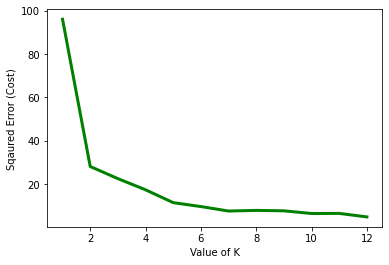

In [35]:
# function returns WSS score for k values from 1 to kmax
def calculate_WSS(points, kmax):
  sse = []
  for k in range(1, kmax+1):
    kmeans = KMeans(n_clusters = k).fit(points)
    centroids = kmeans.cluster_centers_
    pred_clusters = kmeans.predict(points)
    curr_sse = 0
    
    # calculate square of Euclidean distance of each point from its cluster center and add to current WSS
    for i in range(len(points)):
      curr_center = centroids[pred_clusters[i]]
      curr_sse += (points[i, 0] - curr_center[0]) ** 2 + (points[i, 1] - curr_center[1]) ** 2
      
    sse.append(curr_sse)
  return sse

# calculate_WSS(regions_cluster,12)

# plot the cost against K values 
plt.plot(range(1, 13), calculate_WSS(regions_standar,12), color ='g', linewidth ='3') 
plt.xlabel("Value of K") 
plt.ylabel("Sqaured Error (Cost)") 
plt.show() # clear the plot

The silhouette value measures how similar a point is to its own cluster (cohesion) compared to other clusters (separation).

The range of the Silhouette value is between +1 and -1. A high value is desirable and indicates that the point is placed in the correct cluster. If many points have a negative Silhouette value, it may indicate that we have created too many or too few clusters.

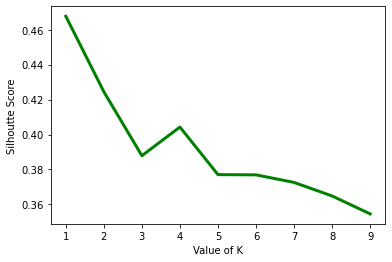

In [36]:
from sklearn.metrics import silhouette_score

sil = []
kmax = 10

# dissimilarity would not be defined for a single cluster, thus, minimum number of clusters should be 2
for k in range(2, kmax+1):
  kmeans = KMeans(n_clusters = k).fit(regions_standar)
  labels = kmeans.labels_
  sil.append(silhouette_score(regions_standar, labels, metric = 'euclidean'))

plt.plot(range(1, 10), sil, color ='g', linewidth ='3') 
plt.xlabel("Value of K") 
plt.ylabel("Silhoutte Score") 
plt.show() # clear the plot

In [37]:
k=5
kmeans = KMeans(n_clusters = k,random_state=0).fit(regions_standar)
kmeans.labels_
regions.insert(0, 'Cluster Labels', kmeans.labels_)

In [38]:
regions.head()

,Cluster Labels,regional_unit,regional_latitude,regional_longitude,coor,Olympus,Kaimaktsalan,Gramos,Vardousia,Giona,...,Askio,Dikti,Verno,Pieria,Dousko,Oeta,Orvilos,Erymanthos,Falakro,Athamanika
0,4,Larissa,39.666667,22.500000,"(39.66666666666666, 22.5)",48.12,152.98,164.98,113.84,115.29,...,114.96,570.79,144.58,68.92,183.56,94.95,212.48,197.66,225.67,113.27
1,2,Rethymno,35.250000,24.583333,"(35.25, 24.58333333333333)",572.18,677.28,657.93,438.80,430.72,...,631.88,84.47,662.48,593.23,653.38,446.98,686.46,389.19,673.40,557.55
2,4,Arta,39.250000,21.250000,"(39.25, 21.25)",132.80,192.47,128.57,99.78,109.70,...,131.22,593.72,156.01,135.22,119.76,101.20,310.37,151.43,331.47,26.30
3,0,Laconia,36.916667,22.666667,"(36.91666666666666, 22.66666666666667)",353.38,452.79,415.28,201.53,195.84,...,399.82,323.77,429.62,371.42,406.14,215.17,502.76,138.00,502.06,312.84
4,2,Chania,35.416667,23.916667,"(35.416666666666664, 23.91666666666667)",536.90,640.70,613.50,395.64,388.35,...,592.14,147.41,622.55,557.09,606.32,405.90,663.29,338.95,653.70,511.78


### Plot the Clustered cities based on distance from mountains

With black dots we plot the mountains

In [39]:
# create map
map_clusters = folium.Map(location=[38.9953683, 21.9877132],zoom_start=8)

# set color scheme for the clusters
x = np.arange(k)
ys = [i + x + (i*x)**2 for i in range(k)]
colors_array = cm.rainbow(np.linspace(0, 1, len(ys)))
rainbow = [colors.rgb2hex(i) for i in colors_array]

# add markers to the map
markers_colors = []
for lat, lng, regional_unit,cluster in zip(regions['regional_latitude'], regions['regional_longitude'], regions['regional_unit'],regions['Cluster Labels']):
    label = '{}'.format(regional_unit)
    label = folium.Popup(regional_unit, parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        radius=3,
        popup=label,
        color=rainbow[cluster-1],
        fill=True,
        fill_color=rainbow[cluster-1],
        fill_opacity=0.7).add_to(map_clusters)
    
for lat, lng, peak, height in zip(mountains['mountain_latitude'], mountains['mountain_longitude'], mountains['peak'],mountains['height']):
    label = folium.Popup(peak, parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        radius=1,
        popup=label,
        color='black',
        fill=True,
        fill_color='black',
        fill_opacity=0.7).add_to(map_clusters)
       
map_clusters

### Define the distance based clusters

Cluster 1

In [40]:
dist_clus1 =regions.loc[regions['Cluster Labels'] == 0, regions.columns[[1] + list(range(5, regions.shape[1]))]]
dist_clus1

,regional_unit,Olympus,Kaimaktsalan,Gramos,Vardousia,Giona,Tymfi,Parnassus,Lakmos,Smolikas,...,Askio,Dikti,Verno,Pieria,Dousko,Oeta,Orvilos,Erymanthos,Falakro,Athamanika
3,Laconia,353.38,452.79,415.28,201.53,195.84,377.01,180.08,335.88,383.94,...,399.82,323.77,429.62,371.42,406.14,215.17,502.76,138.00,502.06,312.84
6,Phocis,176.55,273.18,241.23,22.20,16.41,205.95,32.80,163.67,210.29,...,220.18,474.27,250.19,193.02,238.87,36.69,340.59,69.58,348.23,142.09
8,Phthiotis,132.68,234.59,220.22,41.71,37.05,190.36,41.25,149.42,191.10,...,187.21,496.02,217.83,151.55,225.84,22.63,290.54,120.37,297.47,131.95
13,Achaea,227.21,316.68,267.72,71.72,72.69,228.67,85.40,188.29,236.44,...,259.41,464.38,287.89,241.09,257.11,91.86,396.85,12.97,406.03,165.07
14,Boeotia,195.78,300.72,292.11,86.94,76.53,261.69,42.11,220.24,262.87,...,257.19,425.12,287.78,216.68,296.83,82.85,332.37,120.15,331.37,201.47
15,West Athens,256.91,362.54,360.33,153.34,143.02,330.39,109.00,288.98,331.36,...,322.75,360.69,353.15,278.77,365.57,151.37,373.72,162.21,366.11,270.12
17,West Attica,249.72,355.27,350.09,141.05,130.78,319.51,97.05,277.90,320.84,...,314.02,368.52,344.53,271.30,354.49,139.91,371.90,149.14,365.73,258.69
28,East Attica,269.56,374.98,377.95,174.88,164.50,349.20,130.18,308.20,349.52,...,337.80,348.94,367.97,291.78,384.68,171.58,376.59,185.54,366.47,289.96
29,Elis,279.04,363.84,304.62,126.01,127.46,264.17,137.90,226.68,273.97,...,304.68,456.40,331.79,291.53,288.45,146.41,450.87,44.39,460.67,203.68
35,Euboea,225.90,329.88,344.58,162.69,152.63,319.94,119.76,281.01,318.12,...,298.21,398.92,327.57,248.51,356.07,153.01,321.56,198.31,310.77,265.53


Cluster 2

In [41]:
dist_clus2 =regions.loc[regions['Cluster Labels'] == 1, regions.columns[[1] + list(range(5, regions.shape[1]))]]
dist_clus2

,regional_unit,Olympus,Kaimaktsalan,Gramos,Vardousia,Giona,Tymfi,Parnassus,Lakmos,Smolikas,...,Askio,Dikti,Verno,Pieria,Dousko,Oeta,Orvilos,Erymanthos,Falakro,Athamanika
5,Florina,108.71,37.25,69.95,238.28,244.52,99.49,267.02,121.14,84.35,...,40.00,721.06,11.51,86.13,108.54,226.26,197.49,311.56,232.65,142.05
9,Drama,200.04,202.37,302.21,333.67,332.11,316.08,329.23,310.80,302.20,...,238.78,691.59,242.92,202.03,338.79,313.12,47.75,416.19,7.74,318.97
21,Chalkidiki,100.76,158.93,230.57,217.52,215.78,231.50,213.55,214.93,220.23,...,164.83,605.84,182.22,112.71,261.44,196.90,116.52,299.83,117.95,217.75
22,Thessaloniki,94.13,119.62,204.90,237.54,237.71,213.41,241.45,205.15,200.33,...,139.10,649.87,150.25,96.48,239.26,217.73,87.71,321.38,104.56,212.86
26,Thasos,205.14,242.34,329.28,309.18,305.41,334.27,295.17,319.53,322.21,...,263.17,623.20,275.35,215.04,362.45,288.56,115.80,387.19,82.35,322.39
31,Kilkis,109.31,88.01,187.75,264.51,266.21,204.82,274.59,205.97,190.30,...,126.25,694.24,127.91,101.49,224.97,245.88,78.09,348.03,110.56,218.30
32,Samothrace,271.49,318.09,401.28,351.77,346.18,402.95,329.31,384.17,391.79,...,335.19,596.50,349.41,284.26,432.92,331.96,187.75,422.98,149.70,384.18
36,Kastoria,104.71,66.05,43.26,216.22,223.25,68.45,248.18,91.39,53.25,...,27.96,705.01,20.15,83.92,80.94,206.02,221.72,286.14,254.86,113.13
40,Kavala,201.44,220.74,315.16,322.75,320.17,324.91,313.91,315.15,311.80,...,249.95,660.76,258.00,207.25,350.33,302.03,78.72,403.58,42.36,320.88
41,Serres,151.67,151.50,250.03,294.04,293.63,264.07,294.87,260.06,250.10,...,186.58,684.02,191.01,151.52,286.56,273.92,32.83,377.64,48.78,269.28


Cluster 3

In [42]:
dist_clus3 =regions.loc[regions['Cluster Labels'] == 2, regions.columns[[1] + list(range(5, regions.shape[1]))]]
dist_clus3

,regional_unit,Olympus,Kaimaktsalan,Gramos,Vardousia,Giona,Tymfi,Parnassus,Lakmos,Smolikas,...,Askio,Dikti,Verno,Pieria,Dousko,Oeta,Orvilos,Erymanthos,Falakro,Athamanika
1,Rethymno,572.18,677.28,657.93,438.80,430.72,621.93,404.75,579.83,626.93,...,631.88,84.47,662.48,593.23,653.38,446.98,686.46,389.19,673.40,557.55
4,Chania,536.90,640.70,613.50,395.64,388.35,576.21,365.33,534.52,582.25,...,592.14,147.41,622.55,557.09,606.32,405.90,663.29,338.95,653.70,511.78
23,Rhodes,658.06,756.17,782.93,587.81,577.45,758.22,543.18,718.55,756.66,...,733.46,254.26,761.56,680.52,794.26,584.19,692.47,582.46,662.99,701.63
24,Heraklion,600.17,705.76,693.13,474.25,465.61,658.38,437.59,616.11,662.47,...,663.24,30.67,693.86,621.81,690.85,480.69,703.61,430.70,687.70,594.34
44,Lasithi,634.79,740.29,734.80,517.39,508.27,701.50,478.47,659.24,704.62,...,701.02,30.68,731.51,656.89,734.90,522.05,725.97,480.06,707.06,638.08


Cluster 4

In [43]:
dist_clus4 = regions.loc[regions['Cluster Labels'] == 3, regions.columns[[1] + list(range(5, regions.shape[1]))]]
dist_clus4

,regional_unit,Olympus,Kaimaktsalan,Gramos,Vardousia,Giona,Tymfi,Parnassus,Lakmos,Smolikas,...,Askio,Dikti,Verno,Pieria,Dousko,Oeta,Orvilos,Erymanthos,Falakro,Athamanika
16,Milos,418.65,524.27,515.86,298.98,289.68,482.82,259.53,440.60,485.73,...,482.89,199.40,513.45,440.39,516.52,303.14,526.44,269.32,513.42,419.70
18,Tinos,365.40,468.17,484.14,287.67,277.27,457.93,242.86,417.84,456.99,...,438.41,279.23,467.64,388.05,493.83,283.30,438.32,293.12,418.96,400.67
19,Naxos,438.52,542.10,553.51,349.06,338.82,525.39,305.04,484.43,525.47,...,510.34,209.17,539.95,461.14,560.91,347.40,512.93,340.89,492.58,466.03
27,Chios,364.30,456.03,497.33,336.72,326.79,479.39,294.15,444.02,474.75,...,441.13,369.40,467.05,385.93,515.39,325.64,386.71,367.53,358.87,431.63
34,Samos,466.07,559.55,597.11,422.63,412.33,576.96,378.29,539.94,573.29,...,542.71,315.97,569.29,488.00,613.13,414.33,488.30,439.57,458.70,525.89


Cluster 5

In [44]:
dist_clus5 = regions.loc[regions['Cluster Labels'] == 4, regions.columns[[1] + list(range(5, regions.shape[1]))]]
dist_clus5

,regional_unit,Olympus,Kaimaktsalan,Gramos,Vardousia,Giona,Tymfi,Parnassus,Lakmos,Smolikas,...,Askio,Dikti,Verno,Pieria,Dousko,Oeta,Orvilos,Erymanthos,Falakro,Athamanika
0,Larissa,48.12,152.98,164.98,113.84,115.29,148.10,126.20,117.86,142.30,...,114.96,570.79,144.58,68.92,183.56,94.95,212.48,197.66,225.67,113.27
2,Arta,132.80,192.47,128.57,99.78,109.70,89.48,143.00,49.46,97.40,...,131.22,593.72,156.01,135.22,119.76,101.20,310.37,151.43,331.47,26.30
7,Ioannina,135.32,154.31,66.69,163.85,173.27,25.81,205.12,25.85,38.60,...,95.47,659.23,110.44,126.57,53.84,161.81,296.91,216.37,324.72,43.19
10,Karditsa,89.09,178.57,153.61,73.56,79.37,124.45,103.82,84.73,124.55,...,125.17,561.65,155.39,101.40,160.31,61.40,265.52,152.65,281.17,70.73
11,Kozani,64.90,67.27,75.21,188.20,194.12,82.26,216.12,85.78,68.47,...,12.36,670.49,42.41,44.69,107.32,175.60,201.18,263.55,230.56,102.55
12,Grevena,87.80,110.48,60.95,162.32,169.98,44.20,197.11,39.47,36.07,...,49.01,655.10,72.32,76.39,77.90,153.95,246.24,230.19,273.80,58.57
20,Lefkada,207.79,260.77,177.99,128.27,138.26,137.55,171.66,111.04,150.63,...,199.35,589.31,219.95,209.93,154.12,140.85,385.35,133.92,406.41,93.63
25,Preveza,171.52,215.21,131.42,132.01,142.40,90.80,176.80,65.84,103.74,...,154.12,616.06,173.53,170.37,109.88,138.17,345.98,163.32,369.50,52.33
30,Corfu,219.98,221.52,115.27,220.44,230.78,92.35,265.04,108.17,106.55,...,170.59,702.76,175.29,209.99,77.13,224.91,374.90,247.74,405.17,114.88
33,Magnesia,84.73,190.33,203.57,101.23,99.07,183.75,99.60,149.61,179.39,...,154.81,532.86,184.32,106.85,219.74,80.52,227.97,183.10,234.50,140.44


### Cluster based on similarity of city venues got by Forsquare Api

In [89]:
CLIENT_ID = '###' # your Foursquare ID
CLIENT_SECRET = '###' # your Foursquare Secret
VERSION = '20180605' # Foursquare API version
LIMIT = 100 # A default Foursquare API limit value

print('Your credentails:')
print('CLIENT_ID: ' + CLIENT_ID)
print('CLIENT_SECRET:' + CLIENT_SECRET)

Your credentails:
CLIENT_ID: ###
CLIENT_SECRET:###


Function that extracts the category of the venue

### Explore Cities in Greece
Because its an entire city and there are no many records in the center we search in a wide area with radius 15k

In [48]:
def getNearbyVenues(names, latitudes, longitudes, radius=15000):
    
    venues_list=[]
    for name, lat, lng in zip(names, latitudes, longitudes):
        print(name)
            
        # create the API request URL
        url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
            CLIENT_ID, 
            CLIENT_SECRET, 
            VERSION, 
            lat, 
            lng, 
            radius, 
            100)
            
        # make the GET request
        results = requests.get(url).json()["response"]['groups'][0]['items']
        
        # return only relevant information for each nearby venue
        venues_list.append([(
            name, 
            lat, 
            lng, 
            v['venue']['location']['lat'], 
            v['venue']['location']['lng'],  
            v['venue']['categories'][0]['name']) for v in results])

    nearby_venues = pd.DataFrame([item for venue_list in venues_list for item in venue_list])
    nearby_venues.columns = ['City', 
                  'City Latitude', 
                  'City Longitude', 
                  'Venue Latitude', 
                  'Venue Longitude', 
                  'Venue Category']
    
    return(nearby_venues)

#### Now write the code to run the above function on each city and create a new dataframe called _city_venues_.


In [49]:
# type your answer here
city_venues = getNearbyVenues(names=regions['regional_unit'],
                                   latitudes=regions['regional_latitude'],
                                   longitudes=regions['regional_longitude']
                                  )
city_venues.head()

Larissa
Rethymno
Arta
Laconia
Chania
Florina
Phocis
Ioannina
Phthiotis
Drama
Karditsa
Kozani
Grevena
Achaea
Boeotia
West Athens
Milos
West Attica
Tinos
Naxos
Lefkada
Chalkidiki
Thessaloniki
Rhodes
Heraklion
Preveza
Thasos
Chios
East Attica
Elis
Corfu
Kilkis
Samothrace
Magnesia
Samos
Euboea
Kastoria
Cephalonia
Argolis
Aetolia-Acarnania
Kavala
Serres
Imathia
Arcadia
Lasithi
Evrytania
Trikala
Mount Athos


,City,City Latitude,City Longitude,Venue Latitude,Venue Longitude,Venue Category
0,Larissa,39.666667,22.5,39.641628,22.429617,Dessert Shop
1,Larissa,39.666667,22.5,39.640008,22.414713,Historic Site
2,Larissa,39.666667,22.5,39.634552,22.430006,Coffee Shop
3,Larissa,39.666667,22.5,39.641649,22.416939,Greek Restaurant
4,Larissa,39.666667,22.5,39.639923,22.415980,Nightclub


#### Let's check the size of the resulting dataframe


In [50]:
print(city_venues.shape)
city_venues.head()

(3325, 6)


,City,City Latitude,City Longitude,Venue Latitude,Venue Longitude,Venue Category
0,Larissa,39.666667,22.5,39.641628,22.429617,Dessert Shop
1,Larissa,39.666667,22.5,39.640008,22.414713,Historic Site
2,Larissa,39.666667,22.5,39.634552,22.430006,Coffee Shop
3,Larissa,39.666667,22.5,39.641649,22.416939,Greek Restaurant
4,Larissa,39.666667,22.5,39.639923,22.415980,Nightclub


Let's check how many venues were returned for each neighborhood

In [51]:
city_venues.groupby('City').count()

,City Latitude,City Longitude,Venue Latitude,Venue Longitude,Venue Category
City,,,,,
Achaea,4,4,4,4,4
Aetolia-Acarnania,66,66,66,66,66
Arcadia,88,88,88,88,88
Argolis,100,100,100,100,100
Arta,10,10,10,10,10
Boeotia,36,36,36,36,36
Cephalonia,100,100,100,100,100
Chalkidiki,74,74,74,74,74
Chania,100,100,100,100,100


In [52]:
print('There are {} uniques categories.'.format(len(city_venues['Venue Category'].unique())))

There are 219 uniques categories.


In [53]:
city_venues['Venue Category'].unique()

array(['Dessert Shop', 'Historic Site', 'Coffee Shop', 'Greek Restaurant',
       'Nightclub', 'Café', 'Cocktail Bar', 'Gastropub', 'Park',
       'Souvlaki Shop', 'Plaza', 'Restaurant', 'Supermarket',
       'Italian Restaurant', 'Outdoor Event Space', 'Ice Cream Shop',
       'Dance Studio', 'Gym', 'Gym / Fitness Center', 'Mobile Phone Shop',
       'Furniture / Home Store', 'Wine Bar', 'Snack Place', 'Bar',
       'Kafenio', 'Shopping Mall', 'Music Venue', 'Fast Food Restaurant',
       'Hotel', 'Airport', 'Soccer Stadium', 'Basketball Stadium',
       'Seafood Restaurant', 'Playground', 'Soccer Field',
       'Warehouse Store', 'Deli / Bodega', 'Food Service',
       'Electronics Store', 'Toy / Game Store', 'Basketball Court',
       'Sports Bar', 'Garden Center', 'Taverna', 'Resort', 'Beach',
       'History Museum', 'Hotel Bar', 'Museum', 'Beach Bar',
       'Bed & Breakfast', 'Bakery', 'Pool', 'Go Kart Track', 'Farm',
       'Steakhouse', 'Other Great Outdoors', 'Hotel Pool', 'B

### Analyze Each City

In [54]:
# # one hot encoding
city_onehot = pd.get_dummies(city_venues[['Venue Category']], prefix="", prefix_sep="")

# # add city column back to dataframe
city_onehot['City'] = city_venues['City'] 

# # move city column to the first column
cols = list(city_onehot)
cols.insert(0, cols.pop(cols.index('City')))
city_onehot = city_onehot[cols]
city_onehot.head()

,City,Accessories Store,African Restaurant,Airport,Airport Lounge,Animal Shelter,Aquarium,Art Museum,Athletics & Sports,Auto Workshop,...,Water Park,Waterfall,Waterfront,Whisky Bar,Wine Bar,Wine Shop,Winery,Women's Store,Yoga Studio,Zoo
0,Larissa,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,Larissa,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,Larissa,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,Larissa,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,Larissa,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


#### Next, let's group rows by cities and by taking the mean of the frequency of occurrence of each category

In [55]:
cities_grouped = city_onehot.groupby('City').mean().reset_index()
cities_grouped

,City,Accessories Store,African Restaurant,Airport,Airport Lounge,Animal Shelter,Aquarium,Art Museum,Athletics & Sports,Auto Workshop,...,Water Park,Waterfall,Waterfront,Whisky Bar,Wine Bar,Wine Shop,Winery,Women's Store,Yoga Studio,Zoo
0,Achaea,0.000000,0.00,0.000000,0.00,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.00,0.000000,0.00,0.00,0.000000,0.00,0.25,0.000000,0.00,0.00
1,Aetolia-Acarnania,0.000000,0.00,0.000000,0.00,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.00,0.000000,0.00,0.00,0.015152,0.00,0.00,0.015152,0.00,0.00
2,Arcadia,0.000000,0.00,0.000000,0.00,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.00,0.000000,0.00,0.00,0.000000,0.00,0.00,0.000000,0.00,0.00
3,Argolis,0.000000,0.00,0.000000,0.00,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.00,0.000000,0.00,0.00,0.000000,0.00,0.00,0.000000,0.00,0.00
4,Arta,0.000000,0.00,0.000000,0.00,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.00,0.000000,0.00,0.00,0.000000,0.00,0.00,0.000000,0.00,0.00
5,Boeotia,0.027778,0.00,0.027778,0.00,0.000000,0.000000,0.000000,0.027778,0.027778,...,0.00,0.000000,0.00,0.00,0.027778,0.00,0.00,0.000000,0.00,0.00
6,Cephalonia,0.000000,0.00,0.000000,0.00,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.00,0.000000,0.00,0.00,0.010000,0.00,0.00,0.000000,0.00,0.00
7,Chalkidiki,0.000000,0.00,0.000000,0.00,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.00,0.000000,0.00,0.00,0.000000,0.00,0.00,0.000000,0.00,0.00
8,Chania,0.010000,0.00,0.000000,0.00,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.00,0.000000,0.00,0.00,0.010000,0.00,0.00,0.000000,0.00,0.00
9,Chios,0.000000,0.00,0.000000,0.00,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.00,0.000000,0.00,0.00,0.000000,0.01,0.00,0.000000,0.00,0.00


In [56]:
cities_grouped.shape

(48, 219)

#### Let's print each city along with the top 5 most common venues

In [57]:
num_top_venues = 5

for hood in cities_grouped['City']:
    print("----"+hood+"----")
    temp = cities_grouped[cities_grouped['City'] == hood].T.reset_index()
    temp.columns = ['venue','freq']
    temp = temp.iloc[1:]
    temp['freq'] = temp['freq'].astype(float)
    temp = temp.round({'freq': 2})
    print(temp.sort_values('freq', ascending=False).reset_index(drop=True).head(num_top_venues))
    print('\n')

----Achaea----
                   venue  freq
0                 Resort  0.25
1                 Winery  0.25
2                  Hotel  0.25
3       Greek Restaurant  0.25
4  Performing Arts Venue  0.00


----Aetolia-Acarnania----
              venue  freq
0              Café  0.17
1               Bar  0.09
2             Hotel  0.08
3  Greek Restaurant  0.08
4       Supermarket  0.06


----Arcadia----
              venue  freq
0             Hotel  0.15
1           Taverna  0.11
2              Café  0.10
3  Greek Restaurant  0.08
4             Plaza  0.07


----Argolis----
              venue  freq
0             Hotel  0.12
1              Café  0.10
2  Greek Restaurant  0.07
3           Taverna  0.07
4         Beach Bar  0.05


----Arta----
     venue  freq
0     Café   0.5
1    Plaza   0.2
2   Resort   0.1
3  Kafenio   0.1
4  Butcher   0.1


----Boeotia----
               venue  freq
0               Café  0.22
1                Bar  0.08
2  Accessories Store  0.03
3      Train Station  0.

#### Let's put that into a _pandas_ dataframe

First, let's write a function to sort the venues in descending order.

In [58]:
def return_most_common_venues(row, num_top_venues):
    row_categories = row.iloc[1:]
    row_categories_sorted = row_categories.sort_values(ascending=False)
    
    return row_categories_sorted.index.values[0:num_top_venues]

Now let's create the new dataframe and display the top 10 venues for each city.

In [59]:
num_top_venues = 10

indicators = ['st', 'nd', 'rd']

# create columns according to number of top venues
columns = ['City']
for ind in np.arange(num_top_venues):
    try:
        columns.append('{}{} Most Common Venue'.format(ind+1, indicators[ind]))
    except:
        columns.append('{}th Most Common Venue'.format(ind+1))

# create a new dataframe
cities_venues_sorted = pd.DataFrame(columns=columns)
cities_venues_sorted['City'] = cities_grouped['City']

for ind in np.arange(cities_grouped.shape[0]):
    cities_venues_sorted.iloc[ind, 1:] = return_most_common_venues(cities_grouped.iloc[ind, :], num_top_venues)

cities_venues_sorted.head()

,City,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,Achaea,Resort,Winery,Hotel,Greek Restaurant,Zoo,Factory,Food Service,Food Court,Food & Drink Shop,Food
1,Aetolia-Acarnania,Café,Bar,Hotel,Greek Restaurant,Supermarket,Lounge,Coffee Shop,Mobile Phone Shop,Restaurant,Ouzeri
2,Arcadia,Hotel,Taverna,Café,Greek Restaurant,Plaza,Dessert Shop,Bar,Restaurant,Supermarket,Coffee Shop
3,Argolis,Hotel,Café,Taverna,Greek Restaurant,Beach Bar,Bar,Historic Site,Plaza,Bakery,Ice Cream Shop
4,Arta,Café,Plaza,Resort,Kafenio,Butcher,Zoo,Farm,Food Service,Food Court,Food & Drink Shop


###  Cluster the Cities based on their venue similarity

In [60]:
# set number of clusters
kclusters = 5
#remove city column
cities_grouped_clustering = cities_grouped.drop('City', 1)
# run k-means clustering
kmeans = KMeans(n_clusters=kclusters, random_state=0).fit(cities_grouped_clustering)

# check cluster labels generated for each row in the dataframelen()
kmeans.labels_

array([3, 0, 2, 2, 1, 0, 3, 3, 3, 3, 0, 0, 0, 2, 0, 2, 0, 0, 3, 2, 2, 0,
       2, 0, 0, 0, 2, 0, 3, 3, 0, 3, 4, 3, 1, 0, 0, 3, 3, 3, 3, 0, 3, 0,
       3, 2, 0, 0])

In [61]:
cities_merged = regions[['regional_unit','regional_latitude','regional_longitude']].copy()
#rename column from original region dataset. Was regional unit not city.
cities_merged.rename(columns={"regional_unit": "City"},inplace=True)
cities_merged.head()

,City,regional_latitude,regional_longitude
0,Larissa,39.666667,22.500000
1,Rethymno,35.250000,24.583333
2,Arta,39.250000,21.250000
3,Laconia,36.916667,22.666667
4,Chania,35.416667,23.916667


Let's create a new dataframe that includes the cluster as well as the top 10 venues for each city.

In [62]:
# add clustering labels
cities_venues_sorted.insert(0, 'Cluster Labels', kmeans.labels_)

cities_merged = regions[['regional_unit','regional_latitude','regional_longitude']].copy()
#rename the column so we can merge it
cities_merged.rename(columns={"regional_unit": "City"},inplace=True)

# merge cities_grouped with cities data (regions dataset) to add latitude/longitude for each neighborhood
cities_merged = cities_merged.join(cities_venues_sorted.set_index('City'), on='City')

cities_merged.head()

,City,regional_latitude,regional_longitude,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,Larissa,39.666667,22.500000,0,Café,Coffee Shop,Greek Restaurant,Plaza,Supermarket,Restaurant,Gastropub,Historic Site,Cocktail Bar,Park
1,Rethymno,35.250000,24.583333,3,Greek Restaurant,Hotel,Beach,Taverna,Resort,Café,Bar,Restaurant,Bakery,Beach Bar
2,Arta,39.250000,21.250000,1,Café,Plaza,Resort,Kafenio,Butcher,Zoo,Farm,Food Service,Food Court,Food & Drink Shop
3,Laconia,36.916667,22.666667,2,Café,Greek Restaurant,Hotel,Beach Bar,Plaza,Taverna,Supermarket,River,Donut Shop,Fast Food Restaurant
4,Chania,35.416667,23.916667,3,Greek Restaurant,Hotel,Café,Bar,Beach,Mediterranean Restaurant,Cretan Restaurant,Taverna,Pizza Place,Italian Restaurant


In [63]:
cities_merged.columns

Index(['City', 'regional_latitude', 'regional_longitude', 'Cluster Labels',
       '1st Most Common Venue', '2nd Most Common Venue',
       '3rd Most Common Venue', '4th Most Common Venue',
       '5th Most Common Venue', '6th Most Common Venue',
       '7th Most Common Venue', '8th Most Common Venue',
       '9th Most Common Venue', '10th Most Common Venue'],
      dtype='object')

In [64]:
#find latitude and longitude of Greece
address = 'Greece'

geolocator = Nominatim(user_agent="ny_explorer")
location = geolocator.geocode(address)
latitude = location.latitude
longitude = location.longitude
print('The geograpical coordinate of Greece are {}, {}.'.format(latitude, longitude))

The geograpical coordinate of Greece are 38.9953683, 21.9877132.


### Plot the cities similarity based clusters

In [65]:
# create map
map_clusters = folium.Map(location=[latitude, longitude], zoom_start=7)

# set color scheme for the clusters
x = np.arange(kclusters)
ys = [i + x + (i*x)**2 for i in range(kclusters)]
colors_array = cm.rainbow(np.linspace(0, 1, len(ys)))
rainbow = [colors.rgb2hex(i) for i in colors_array]

# add markers to the map
markers_colors = []
for lat, lon, poi, cluster in zip(cities_merged['regional_latitude'], cities_merged['regional_longitude'], cities_merged['City'], cities_merged['Cluster Labels']):
    label = folium.Popup(str(poi) + ' Cluster ' + str(cluster), parse_html=True)
    folium.CircleMarker(
        [lat, lon],
        radius=4,
        popup=label,
        color=rainbow[cluster-1],
        fill=True,
        fill_color=rainbow[cluster-1],
        fill_opacity=0.7).add_to(map_clusters)
       
map_clusters

In [66]:
ven_clus1 = cities_merged.loc[cities_merged['Cluster Labels'] == 0, cities_merged.columns[list(range(0,1))]]
ven_clus1

,City
0,Larissa
5,Florina
8,Phthiotis
9,Drama
10,Karditsa
11,Kozani
12,Grevena
14,Boeotia
15,West Athens
17,West Attica


In [67]:
ven_clus2 = cities_merged.loc[cities_merged['Cluster Labels'] == 1, cities_merged.columns[list(range(0,1))]]
ven_clus2

,City
2,Arta
6,Phocis


In [68]:
ven_clus3 = cities_merged.loc[cities_merged['Cluster Labels'] == 2, cities_merged.columns[list(range(0,1))]]
ven_clus3

,City
3,Laconia
7,Ioannina
29,Elis
36,Kastoria
38,Argolis
42,Imathia
43,Arcadia
45,Evrytania
46,Trikala


In [69]:
ven_clus4 = cities_merged.loc[cities_merged['Cluster Labels'] == 3, cities_merged.columns[list(range(0,1))]]
ven_clus4

,City
1,Rethymno
4,Chania
13,Achaea
16,Milos
18,Tinos
19,Naxos
20,Lefkada
21,Chalkidiki
23,Rhodes
24,Heraklion


In [70]:
ven_clus5 = cities_merged.loc[cities_merged['Cluster Labels'] == 4, cities_merged.columns[list(range(0,1))]]
ven_clus5

,City
47,Mount Athos


### Now we have both distance similar as venue similar cities so we combine them to find mountains destinations based on it.

Create a list of clustered dataframes so we can iterate over them

In [71]:
distance_based = [dist_clus1,dist_clus2,dist_clus3,dist_clus4,dist_clus5]

In [72]:
venue_based = [ven_clus1,ven_clus2,ven_clus3,ven_clus4,ven_clus5]

Merge the clustered dataframes based on same city column

In [73]:
for dis_clus in distance_based:
    dis_clus.rename({"regional_unit": "City"}, axis=1, inplace=True)

In [74]:
datas= []

for dis_clus in distance_based:
    for ven_clus in venue_based: 
        df = pd.merge(dis_clus, ven_clus, on=['City'], how='inner')
        if(df.shape[0] > 0):
            datas.append(df)

Lets see a random dataframe of the list

In [75]:
datas[2]

,City,Olympus,Kaimaktsalan,Gramos,Vardousia,Giona,Tymfi,Parnassus,Lakmos,Smolikas,...,Askio,Dikti,Verno,Pieria,Dousko,Oeta,Orvilos,Erymanthos,Falakro,Athamanika
0,Laconia,353.38,452.79,415.28,201.53,195.84,377.01,180.08,335.88,383.94,...,399.82,323.77,429.62,371.42,406.14,215.17,502.76,138.00,502.06,312.84
1,Elis,279.04,363.84,304.62,126.01,127.46,264.17,137.90,226.68,273.97,...,304.68,456.40,331.79,291.53,288.45,146.41,450.87,44.39,460.67,203.68
2,Argolis,272.09,373.94,346.98,127.95,120.24,311.16,98.36,268.98,315.97,...,323.97,370.35,354.34,291.16,343.25,137.68,418.08,93.96,417.59,246.90
3,Arcadia,278.39,374.36,332.69,122.43,118.33,294.25,110.86,253.25,301.36,...,319.57,399.64,348.96,294.92,323.39,138.51,437.94,56.20,441.93,230.16


We have only the cities that meets both criteria. Distance and similarity.

Number of sub dataframes created

In [76]:
len(datas)

14

I filter the dataframes with only one record cause it cannot give us similar recommendations .

In [77]:
datas2= []
# remove the dataframes with only one record
for data in datas:
    if(data.shape[0]>1):
        datas2.append(data)
        

New number of dataframes without the sinlge record ones.

In [78]:
len(datas2)

10

We gonna keep only the 3 closest mountains of every dataframe.

To achieve this we create a new row with the mean of all mountains for each city and take the 3 smallest values.

In [79]:
N = 3
cols=[]
for data in datas2:
    df = data.copy()
    df.loc['mean'] = df.mean()
    df = df.mask(df.tail(1).rank(axis=1, method='min', ascending=True) > N, 0)
    cols.append(df.tail(1).loc[:, (df.tail(1) != 0).any(axis=0)].columns)

We create a list with the names of the 3 closest mountains of each dataframe so we can filter the results

In [80]:
cols

[Index(['City', 'Aigaleo', 'Pastra', 'Parnitha'], dtype='object'),
 Index(['City', 'Zavitsa', 'Tsemperou', 'Mainalo'], dtype='object'),
 Index(['City', 'Chortiatis', 'Vrontous', 'Menoikio'], dtype='object'),
 Index(['City', 'Vermio', 'Askio', 'Verno'], dtype='object'),
 Index(['City', 'Fengari', 'Pangaion', 'Athos'], dtype='object'),
 Index(['City', 'Ida', 'Kedros', 'Dikti'], dtype='object'),
 Index(['City', 'Exobourgo', 'Zas', 'Ochi'], dtype='object'),
 Index(['City', 'Antichasia', 'Chasia', 'Athamanika'], dtype='object'),
 Index(['City', 'Lakmos', 'Chasia', 'Athamanika'], dtype='object'),
 Index(['City', 'Kokkini Rachi', 'Agia Dynati', 'Elati'], dtype='object')]

In [81]:
datas2[0][cols[0]]

,City,Aigaleo,Pastra,Parnitha
0,Phthiotis,136.89,107.12,130.91
1,Boeotia,65.32,35.32,61.60
2,West Athens,3.46,33.53,17.68
3,West Attica,10.22,22.88,22.41
4,East Attica,26.54,54.72,28.03
5,Euboea,60.22,63.74,43.89


In [82]:
min_dis_moun = []

for i in range(len(datas2)):
    min_dis_moun.append(datas2[i][cols[i]])

In [83]:
len(min_dis_moun)

10

## Final Plot

### The cities and the 3 closest mountains have the same color. The mountains represent with square marker and cities with circular

In [88]:
# create map
map_clusters = folium.Map(location=[38.9953683, 21.9877132],zoom_start=6)

# set color scheme for the clusters
x = np.arange(len(min_dis_moun))
ys = [i + x + (i*x)**2 for i in range(len(min_dis_moun))]
colors_array = cm.rainbow(np.linspace(0, 1, len(ys)))
rainbow = [colors.rgb2hex(i) for i in colors_array]

# add markers to the map
markers_colors = []
for j in range(len(min_dis_moun)):
    for lat, lng, regional_unit in zip(regions['regional_latitude'], regions['regional_longitude'], regions['regional_unit']):
        if(regional_unit in min_dis_moun[j].values):
            label = '{}'.format(regional_unit)
            label = folium.Popup(regional_unit, parse_html=True)
            folium.CircleMarker(
                [lat, lng],
                radius=5,
                popup=label,
                color=rainbow[j-2],
                fill=True,
                fill_color=rainbow[j-2],
                fill_opacity=0.7).add_to(map_clusters)
    for lat, lng, peak, height in zip(mountains['mountain_latitude'], mountains['mountain_longitude'], mountains['peak'],mountains['height']):
        if(peak in min_dis_moun[j].columns):
            label = folium.Popup(peak, parse_html=True)
            folium.RegularPolygonMarker(
                [lat, lng],
                radius=5,
                popup=label,
                color=rainbow[j-2],
                fill=True,
                fill_color='black',
                fill_opacity=0.7).add_to(map_clusters)
map_clusters